In [2]:
import pandas as pd
import numpy as np
import tensorflow as tf

In [21]:
dataset = pd.read_csv(r'exercise_dataset_augmented.csv')
dataset

,"Activity, Exercise or Sport (1 hour)",130 lb,155 lb,180 lb,205 lb,Calories per kg
0,"Cycling, mountain bike, bmx",502,598,695,791,"1,75072971940299"
1,"Cycling, mountain bike, bmx","502,05","597,04","694,74","790,31","0,77753507660233"
2,"Cycling, mountain bike, bmx","502,84","598,45","694,22","791,75","1,95978975711294"
3,"Cycling, mountain bike, bmx","501,71","597,25","694,94","790,11","1,72215381336372"
4,"Cycling, mountain bike, bmx","501,89","598,28","695,05","791,64","2,72951439218936"
...,...,...,...,...,...,...
2475,"Teach physical education,exercise class","236,66","280,51","327,82","371,41","0,17763815610374"
2476,"Teach physical education,exercise class","235,6","280,3","326,53","371,29","1,21900753716865"
2477,"Teach physical education,exercise class","236,84","281,36","326,66","371,45","1,2068165999778"
2478,"Teach physical education,exercise class","235,22","281,61","327,9","371,58","1,42075608943933"


In [22]:
X = dataset.drop(['Activity, Exercise or Sport (1 hour)'],axis=1)
X = X.applymap(lambda x: float(x.replace(',', '')))
X['Mean_Calories'] = X[['130 lb','155 lb','180 lb','205 lb']].mean(axis=1)
X

C:\Users\User\AppData\Local\Temp\ipykernel_16040\4114967831.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  X = X.applymap(lambda x: float(x.replace(',', '')))


,130 lb,155 lb,180 lb,205 lb,Calories per kg,Mean_Calories
0,502.0,598.0,695.0,791.0,1.750730e+14,646.50
1,50205.0,59704.0,69474.0,79031.0,7.775351e+13,64603.50
2,50284.0,59845.0,69422.0,79175.0,1.959790e+14,64681.50
3,50171.0,59725.0,69494.0,79011.0,1.722154e+14,64600.25
4,50189.0,59828.0,69505.0,79164.0,2.729514e+14,64671.50
...,...,...,...,...,...,...
2475,23666.0,28051.0,32782.0,37141.0,1.776382e+13,30410.00
2476,2356.0,2803.0,32653.0,37129.0,1.219008e+14,18735.25
2477,23684.0,28136.0,32666.0,37145.0,1.206817e+13,30407.75
2478,23522.0,28161.0,3279.0,37158.0,1.420756e+14,23030.00


In [72]:
y = dataset['Activity, Exercise or Sport (1 hour)']
y

0                   Cycling, mountain bike, bmx
1                   Cycling, mountain bike, bmx
2                   Cycling, mountain bike, bmx
3                   Cycling, mountain bike, bmx
4                   Cycling, mountain bike, bmx
                         ...                   
2475    Teach physical education,exercise class
2476    Teach physical education,exercise class
2477    Teach physical education,exercise class
2478    Teach physical education,exercise class
2479    Teach physical education,exercise class
Name: Activity, Exercise or Sport (1 hour), Length: 2480, dtype: object

In [51]:
y.value_counts()

Activity, Exercise or Sport (1 hour)
Cycling, mountain bike, bmx                10
Walking 3.5 mph, brisk pace                10
Bird watching                              10
Marching, rapidly, military                10
Children's games, hopscotch, dodgeball     10
                                           ..
Handball                                   10
Handball, team                             10
Hockey, field hockey                       10
Hockey, ice hockey                         10
Teach physical education,exercise class    10
Name: count, Length: 248, dtype: int64

In [71]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
le = LabelEncoder()
y_label=le.fit_transform(y)

In [85]:
n_label=len(le.classes_)
n_label


248

In [73]:
y = pd.DataFrame({'label': y_label, 'activity': y})
y

,label,activity
0,61,"Cycling, mountain bike, bmx"
1,61,"Cycling, mountain bike, bmx"
2,61,"Cycling, mountain bike, bmx"
3,61,"Cycling, mountain bike, bmx"
4,61,"Cycling, mountain bike, bmx"
...,...,...
2475,208,"Teach physical education,exercise class"
2476,208,"Teach physical education,exercise class"
2477,208,"Teach physical education,exercise class"
2478,208,"Teach physical education,exercise class"


In [74]:
X

,130 lb,155 lb,180 lb,205 lb,Calories per kg,Mean_Calories
0,502.0,598.0,695.0,791.0,1.750730e+14,646.50
1,50205.0,59704.0,69474.0,79031.0,7.775351e+13,64603.50
2,50284.0,59845.0,69422.0,79175.0,1.959790e+14,64681.50
3,50171.0,59725.0,69494.0,79011.0,1.722154e+14,64600.25
4,50189.0,59828.0,69505.0,79164.0,2.729514e+14,64671.50
...,...,...,...,...,...,...
2475,23666.0,28051.0,32782.0,37141.0,1.776382e+13,30410.00
2476,2356.0,2803.0,32653.0,37129.0,1.219008e+14,18735.25
2477,23684.0,28136.0,32666.0,37145.0,1.206817e+13,30407.75
2478,23522.0,28161.0,3279.0,37158.0,1.420756e+14,23030.00


In [78]:
dataset=pd.concat([X['Mean_Calories'],y],axis=1)
# dataset.to_csv('Exercise_Output.csv')

In [81]:
dataset=pd.read_csv('Exercise_Output.csv',index_col=0)
dataset

,Mean_Calories,label,activity
0,646.50,61,"Cycling, mountain bike, bmx"
1,64603.50,61,"Cycling, mountain bike, bmx"
2,64681.50,61,"Cycling, mountain bike, bmx"
3,64600.25,61,"Cycling, mountain bike, bmx"
4,64671.50,61,"Cycling, mountain bike, bmx"
...,...,...,...
2475,30410.00,208,"Teach physical education,exercise class"
2476,18735.25,208,"Teach physical education,exercise class"
2477,30407.75,208,"Teach physical education,exercise class"
2478,23030.00,208,"Teach physical education,exercise class"


Jadi ada 4 model 
- berat badan  <= 60
- berat badan  > 60 and berat badan <= 70
- berat badan > 70 and berat badan <= 90
- berat badan > 90 

Gunakan 1 model (mean kalori every weight):
- Mean_Calories	 
- label	
- activity

In [92]:
def calculate_bmr(weight_kg, height_cm, age, gender):
    if gender == 'male':
        bmr = 10 * weight_kg + 6.25 * height_cm - 5 * age + 5
    elif gender == 'female':
        bmr = 10 * weight_kg + 6.25 * height_cm - 5 * age - 161
    else:
        raise ValueError("Invalid gender")
    return bmr

def calculate_tdee(bmr, activity_factor):
    tdee = bmr * activity_factor
    return tdee

# Contoh penggunaan
weight = 90  # Berat badan dalam kilogram
height = 180  # Tinggi badan dalam sentimeter
age = 21  # Usia
gender = 'male'  # Jenis kelamin ('male' atau 'female')
activity_factor = 1.375  # Faktor aktivitas fisik (contoh: sedang aktif)

bmr = calculate_bmr(weight, height, age, gender)
tdee = calculate_tdee(bmr, activity_factor)
kalori_user = 4662
print(f"BMR: {bmr} calories")
print(f"TDEE: {tdee} calories")
print('Excess calories', kalori_user-tdee)

BMR: 1925.0 calories
TDEE: 2646.875 calories
Excess calories 2015.125


### Calculation :
- Excess calories  => Model (calori burn per kg) => acitivity

## Modeling

In [103]:
X = dataset[['Mean_Calories']]
y = dataset[['label']]

In [104]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X),index=X.index,columns=X.columns)
X

,Mean_Calories
0,-1.530172
1,0.892225
2,0.895179
3,0.892102
4,0.894800
...,...
2475,-0.402867
2476,-0.845053
2477,-0.402953
2478,-0.682388


In [105]:
X.shape

(2480, 1)

In [109]:
import matplotlib.pyplot as plt
def plot_training_history(history):
    plt.figure(figsize=(10, 4))

    # Plot training & validation loss values
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend(['Train', 'Validation'], loc='upper right')

    # Plot training & validation accuracy values
    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend(['Train', 'Validation'], loc='lower right')

    plt.tight_layout()
    plt.show()

In [108]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build a simple neural network model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(256, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(len(le.classes_), activation='softmax')
])


# Compile the model
custom_optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=custom_optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])


# Train the model
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
history=model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test), callbacks=[early_stopping])


# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss}, Test Accuracy: {accuracy}')

Epoch 1/100
62/62 [==============================] - 1s 16ms/step - loss: 5.5120 - accuracy: 0.0025 - val_loss: 5.5008 - val_accuracy: 0.0000e+00
Epoch 2/100
62/62 [==============================] - 1s 14ms/step - loss: 5.4312 - accuracy: 0.0045 - val_loss: 5.3766 - val_accuracy: 0.0040
Epoch 3/100
62/62 [==============================] - 1s 14ms/step - loss: 5.3133 - accuracy: 0.0040 - val_loss: 5.2966 - val_accuracy: 0.0101
Epoch 4/100
62/62 [==============================] - 1s 14ms/step - loss: 5.2384 - accuracy: 0.0076 - val_loss: 5.2642 - val_accuracy: 0.0060
Epoch 5/100
62/62 [==============================] - 1s 13ms/step - loss: 5.1795 - accuracy: 0.0060 - val_loss: 5.2805 - val_accuracy: 0.0060
Epoch 6/100
62/62 [==============================] - 1s 13ms/step - loss: 5.1437 - accuracy: 0.0081 - val_loss: 5.2466 - val_accuracy: 0.0020
Epoch 7/100
62/62 [==============================] - 1s 13ms/step - loss: 5.0981 - accuracy: 0.0116 - val_loss: 5.2452 - val_accuracy: 0.0081
Ep

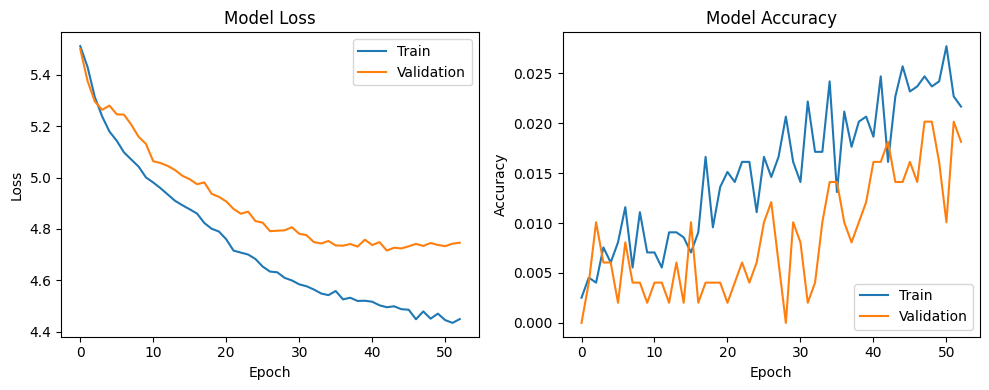

In [110]:
plot_training_history(history)